In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv("intents_data_3.csv")
df.head(5)

Text     Intent
0  20 + 65  calculate
1  15 * 45  calculate
2  12 / 48  calculate
3  23 - 78  calculate
4  56 + 16  calculate

In [76]:
df.Intent.value_counts()

calculate     100
definition    100
Name: Intent, dtype: int64

In [77]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [78]:
intent = df.Intent.map({
    "calculate": 0,
    "definition": 1
})

intent

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Intent, Length: 200, dtype: int64

In [79]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [80]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        # if token.is_punct:
        #     continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [81]:
text = df.Text.apply(preprocess)

In [82]:
text

0                                       20 + 65
1                                       15 * 45
2                                       12 / 48
3                                       23 - 78
4                                       56 + 16
                         ...                   
195           what be another word for ' word '
196      be there a technical term for ' word '
197    let I see ' word ' define in simple term
198            could you clarify ' word ' for I
199                       what do ' word ' mean
Name: Text, Length: 200, dtype: object

In [83]:
df1 = pd.concat([text, intent], axis="columns")

In [84]:
df1

Text  Intent
0                                     20 + 65       0
1                                     15 * 45       0
2                                     12 / 48       0
3                                     23 - 78       0
4                                     56 + 16       0
..                                        ...     ...
195         what be another word for ' word '       1
196    be there a technical term for ' word '       1
197  let I see ' word ' define in simple term       1
198          could you clarify ' word ' for I       1
199                     what do ' word ' mean       1

[200 rows x 2 columns]

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
v = CountVectorizer(ngram_range=(1, 2))

x = v.fit_transform(df1.Text.values).toarray()

In [87]:
y = df1.Intent

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [89]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [90]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

Text(45.722222222222214, 0.5, 'Truth')

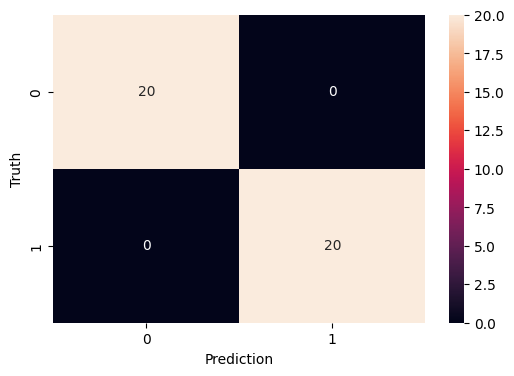

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [92]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [93]:
from  sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [94]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [108]:
{
    "calculate": 0,
    "definition": 1
}

phrases = "explane word"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[1]
[[0.27 0.73]]


## Deep Learning